In [1]:
import sys
from pathlib import Path

root_dir = Path.cwd().parent
if str(root_dir) not in sys.path:
    sys.path.append(str(root_dir))

### Importation des données

In [5]:
import pandas as pd #type: ignore

data_path = "data/test_BTC_daily.csv"

df = pd.read_csv(data_path, index_col=0, parse_dates=True)
df.head()

,open,high,low,close,volume
timestamp,,,,,
2018-01-01,13715.65,13818.55,12750.00,13380.00,8609.915844
2018-01-02,13382.16,15473.49,12890.02,14675.11,20078.092111
2018-01-03,14690.00,15307.56,14150.00,14919.51,15905.667639
2018-01-04,14919.51,15280.00,13918.04,15059.54,21329.649574
2018-01-05,15059.56,17176.24,14600.00,16960.39,23251.491125


---------------------------------------------------------------------------------------------

Toutes les stratégies disponibles se trouvent dans le dossier *strategies* du package, chacune dans son propre module. Les stratégies *ma_crossover* et *rsi_strategy* sont des stratégies simples ne nécessitant pas d'apprentissage statistique, par conséquent elles sont construites à l'aide d'un décorateur. Les stratégies *LinearTrendStrategy* et *ARIMAStrategy* héritent quant à elles de la classe *Strategy* car elles implémentent la méthode *fit()* pour optimiser leurs paramètres.

### Appel de la stratégie Moving Average Crossover

Voici comment on backtest une stratégie :
- Une instance de la classe de la stratégie souhaitée est créée avec les paramètres souhaités
- Une instance de la classe *Backtester* est créée avec les paramètres souhaités
- Le backtest est lancé à l'aide la méthode *run()* qui prend en argument la stratégie à backtester et renvoie un objet de type Result

In [6]:
from strategies.moving_average import ma_crossover
from main.backtester import Backtester

strategy_macross = ma_crossover(
                                historical_data=df,
                                current_position=0,
                                short_window=20,
                                long_window=50
                                )

backtester = Backtester(
                        data=df,
                        initial_capital=100000,
                        commission=0.01,
                        slippage=0.001,
                        rebalancing_frequency='D'
                        )

result_macross = backtester.run(strategy_macross)

L'objet de type *Result* permet d'une part d'afficher divers graphiques à partir des données générées par la stratégie backtestée comme l'évolution de la Net Asset Value, les positions prises ou encore la distribution empiriques des rendements.

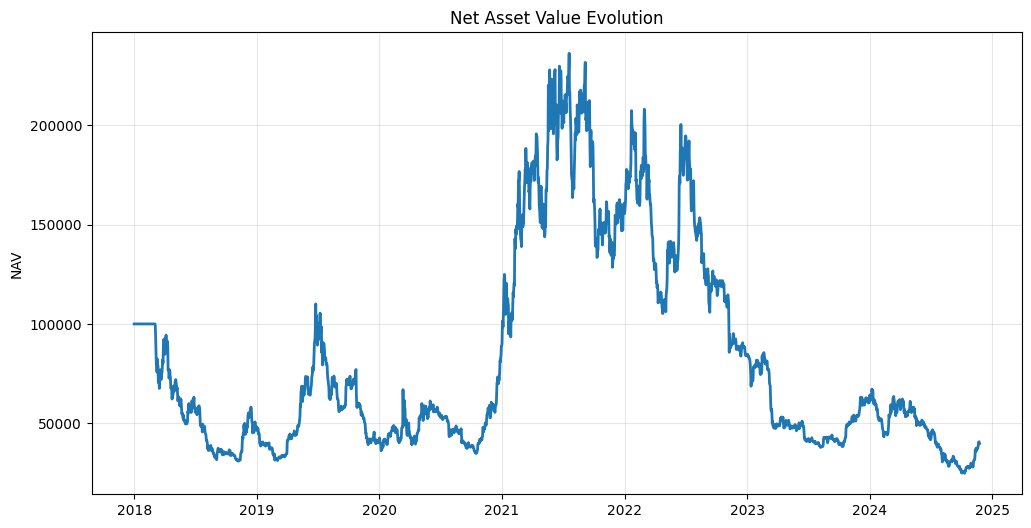

In [7]:
result_macross.plot(what='nav',backend='matplotlib')

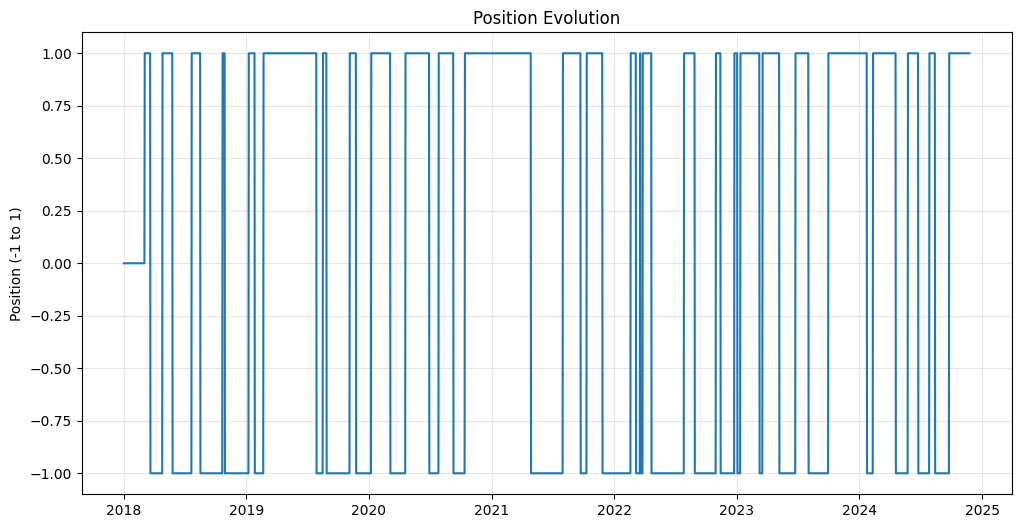

In [8]:
result_macross.plot(what='positions',backend='matplotlib')

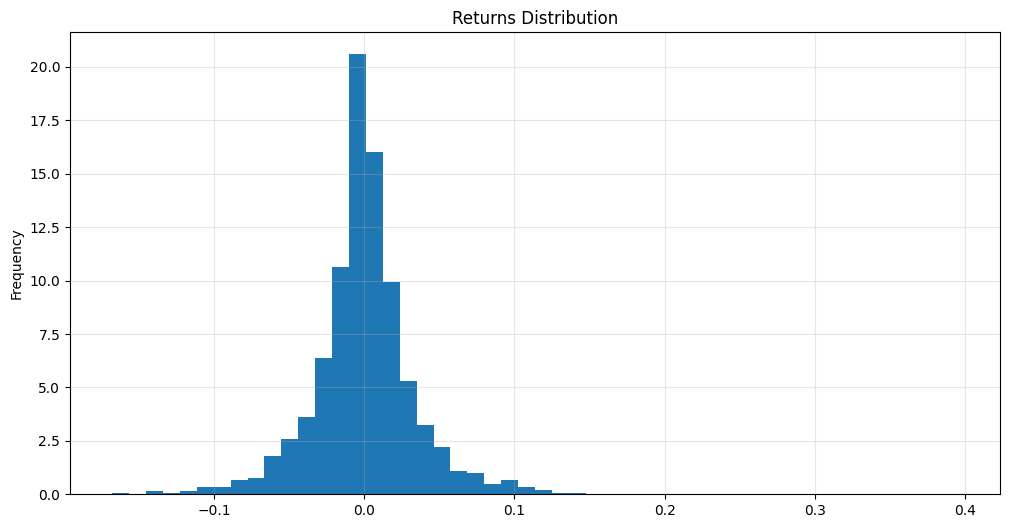

In [9]:
result_macross.plot(what='returns',backend='matplotlib')

L'objet de type *Result* permet d'autre part de calculer les métriques de la stratégie backtestée en laissant à l'utilisateur la liberté de choisir entre seulement les métriques essentielles (avec la méthode *get_essentiel_metrics()*) et toutes les métriques disponibles (avec la méthode *get_all_metrics()*).

In [10]:
dict_essential_metrics_macross = result_macross.get_essential_metrics()
df_essential_metrics_macross = pd.DataFrame([dict_essential_metrics_macross], columns=dict_essential_metrics_macross.keys(), index=['MA Crossover']).T
df_essential_metrics_macross

,MA Crossover
Total Return (%),-60.138683
Annualized Return (%),5.675848
Volatility (%),54.828368
Sharpe Ratio,0.103520
Maximum Drawdown (%),-89.479321
Sortino Ratio,0.152636
Number of Trades,56.000000
Winning Trades (%),50.000000


In [11]:
dict_metrics_macross = result_macross.get_all_metrics()
df_metrics_macross = pd.DataFrame([dict_metrics_macross], columns=dict_metrics_macross.keys(), index=['MA Crossover']).T
df_metrics_macross

,MA Crossover
Total Return (%),-60.138683
Annualized Return (%),5.675848
Volatility (%),54.828368
Sharpe Ratio,0.103520
Maximum Drawdown (%),-89.479321
Sortino Ratio,0.152636
Number of Trades,56.000000
Winning Trades (%),50.000000
CAGR (%),-8.787331
Skewness,0.704230


### Appel de la stratégie RSI

On peut évidemment adopter la même approche pour la stratégie basée sur le RSI.

In [12]:
from strategies.RSI import rsi_strategy

strategy_rsi = rsi_strategy(
                                    historical_data=df,
                                    current_position=0,
                                    rsi_period=14,
                                    overbought=70,
                                    oversold=30
                                    )

result_rsi  = backtester.run(strategy_rsi)

Comme on peut le voir ci-dessous, la méthode *plot()* de la classe *Result* laisse également la possibilité à l'utilisateur de choisir le style des graphiques entre matplotlib, seaborn et plotly.

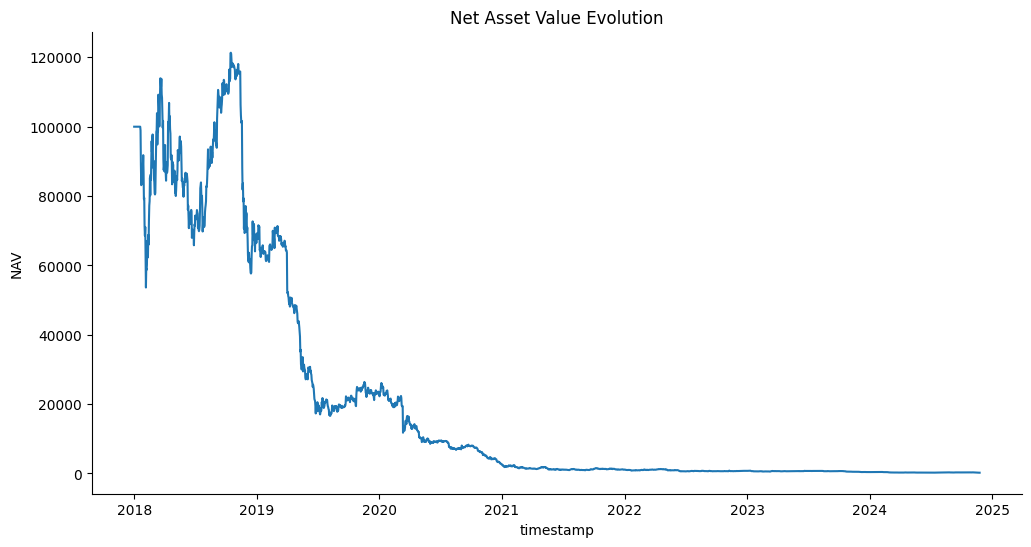

In [13]:
result_rsi.plot(what='nav',backend='seaborn')

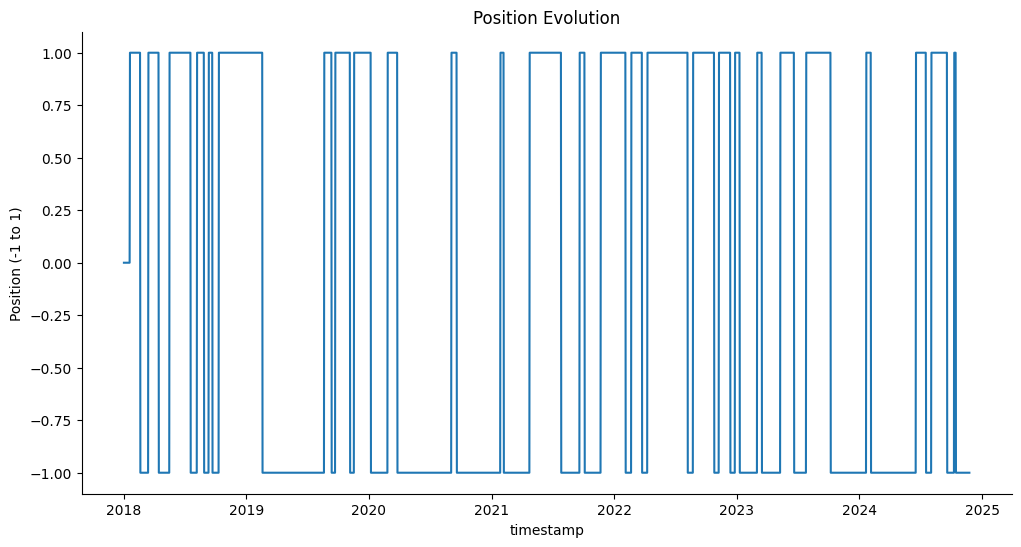

In [14]:
result_rsi.plot(what='positions',backend='seaborn')

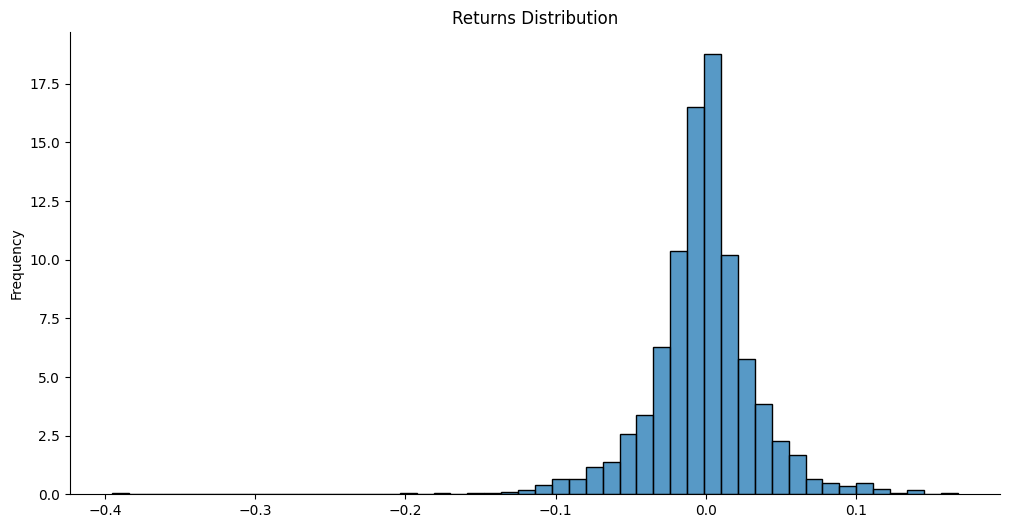

In [15]:
result_rsi.plot(what='returns',backend='seaborn')

In [16]:
dict_essential_metrics_rsi = result_rsi.get_essential_metrics()
df_essential_metrics_rsi = pd.DataFrame([dict_essential_metrics_rsi], columns=dict_essential_metrics_rsi.keys(), index=['Linear Trend']).T
df_essential_metrics_rsi

,Linear Trend
Total Return (%),-99.787758
Annualized Return (%),-45.208264
Volatility (%),56.368501
Sharpe Ratio,-0.802013
Maximum Drawdown (%),-99.828803
Sortino Ratio,-1.066423
Number of Trades,55.000000
Winning Trades (%),9.090909


In [17]:
dict_all_metrics_rsi = result_rsi.get_all_metrics()
df_all_metrics_rsi = pd.DataFrame([dict_all_metrics_rsi], columns=dict_all_metrics_rsi.keys(), index=['Linear Trend']).T
df_all_metrics_rsi

,Linear Trend
Total Return (%),-99.787758
Annualized Return (%),-45.208264
Volatility (%),56.368501
Sharpe Ratio,-0.802013
Maximum Drawdown (%),-99.828803
Sortino Ratio,-1.066423
Number of Trades,55.000000
Winning Trades (%),9.090909
CAGR (%),-45.964020
Skewness,-0.579900


### Appel de la stratégie Linear Trend

Pour les stratégies plus complexes comme Linear Trend nécessitant un apprentissage statistique sur les données historiques le fonctionnement reste le même car l'apprentissage se fait automatiquement au lancement du backtest.

In [18]:
from strategies.linear_trend import LinearTrendStrategy

strategy_linear_trend = LinearTrendStrategy(
                                            window_size=20,
                                            trend_threshold=0.001
                                            )

result_linear_trend  = backtester.run(strategy_linear_trend)

In [19]:
result_linear_trend.plot(what='nav',backend='plotly')

In [20]:
result_linear_trend.plot(what='positions',backend='plotly')

In [21]:
result_linear_trend.plot(what='returns',backend='plotly')

In [22]:
dict_essential_metrics_linear_trend = result_linear_trend.get_essential_metrics()
df_essential_metrics_linear_trend = pd.DataFrame([dict_essential_metrics_linear_trend], columns=dict_essential_metrics_linear_trend.keys(), index=['Linear Trend']).T
df_essential_metrics_linear_trend

,Linear Trend
Total Return (%),-92.628027
Annualized Return (%),-17.249867
Volatility (%),41.884767
Sharpe Ratio,-0.411841
Maximum Drawdown (%),-96.684759
Sortino Ratio,-0.573650
Number of Trades,174.000000
Winning Trades (%),29.885057


In [23]:
dict_all_metrics_linear_trend = result_linear_trend.get_all_metrics()
df_all_metrics_linear_trend = pd.DataFrame([dict_all_metrics_linear_trend], columns=dict_all_metrics_linear_trend.keys(), index=['Linear Trend']).T
df_all_metrics_linear_trend

,Linear Trend
Total Return (%),-92.628027
Annualized Return (%),-17.249867
Volatility (%),41.884767
Sharpe Ratio,-0.411841
Maximum Drawdown (%),-96.684759
Sortino Ratio,-0.573650
Number of Trades,174.000000
Winning Trades (%),29.885057
CAGR (%),-22.952531
Skewness,-0.035028


### Tests unitaires

Divers tests unitaires ont été créé à l'aide du package pytest et peuvent être lancés directement depuis le notebook.

In [27]:
!pytest tests/test_backtester.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\projet
plugins: anyio-4.3.0, dash-2.18.2
collecting ... collected 8 items

tests/test_backtester.py::test_backtester_initialization PASSED          [ 12%]
tests/test_backtester.py::test_backtester_with_strategy PASSED           [ 25%]
tests/test_backtester.py::test_backtester_rebalancing_daily PASSED       [ 37%]
tests/test_backtester.py::test_backtester_rebalancing_intraday PASSED    [ 50%]
tests/test_backtester.py::test_backtester_invalid_frequency PASSED       [ 62%]
tests/test_backtester.py::test_backtester_frequency_validation PASSED    [ 75%]
tests/test_backtester.py::test_backtester_with_costs PASSED              [ 87%]
tests/test_backtester.py::test_backtester_with_real_data PASSED          [100%]

====

In [28]:
!pytest tests/test_data_utils.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\projet
plugins: anyio-4.3.0, dash-2.18.2
collecting ... collected 3 items

tests/test_data_utils.py::test_csv_loading PASSED                        [ 33%]
tests/test_data_utils.py::test_data_format PASSED                        [ 66%]
tests/test_data_utils.py::test_data_continuity PASSED                    [100%]

============================== 3 passed in 3.24s ==============================


In [29]:
!pytest tests/test_metrics.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\projet
plugins: anyio-4.3.0, dash-2.18.2
collecting ... collected 6 items

tests/test_metrics.py::test_annualized_return PASSED                     [ 16%]
tests/test_metrics.py::test_annualized_std PASSED                        [ 33%]
tests/test_metrics.py::test_sharpe_ratio PASSED                          [ 50%]
tests/test_metrics.py::test_max_drawdown PASSED                          [ 66%]
tests/test_metrics.py::test_count_trades PASSED                          [ 83%]
tests/test_metrics.py::test_winning_trades_percentage PASSED             [100%]

============================== 6 passed in 3.19s ==============================


In [30]:
!pytest tests/test_result.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\projet
plugins: anyio-4.3.0, dash-2.18.2
collecting ... collected 7 items

tests/test_result.py::test_result_initialization PASSED                  [ 14%]
tests/test_result.py::test_essential_metrics PASSED                      [ 28%]
tests/test_result.py::test_all_metrics PASSED                            [ 42%]
tests/test_result.py::test_nav_calculation PASSED                        [ 57%]
tests/test_result.py::test_plotting_functions PASSED                     [ 71%]
tests/test_result.py::test_compare_results PASSED                        [ 85%]
tests/test_result.py::test_error_handling PASSED                         [100%]

============================== 7 passed in 5.83s ==============================


In [31]:
!pytest tests/test_strategy.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.7, pytest-7.4.4, pluggy-1.0.0 -- C:\Users\rabhi\anaconda3\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\rabhi\Documents\Master 272 IEF - Dauphine\M2\S1\Python POO\projet
plugins: anyio-4.3.0, dash-2.18.2
collecting ... collected 4 items

tests/test_strategy.py::test_strategy_decorator PASSED                   [ 25%]
tests/test_strategy.py::test_moving_average_crossover PASSED             [ 50%]
tests/test_strategy.py::test_strategy_position_bounds PASSED             [ 75%]
tests/test_strategy.py::test_custom_strategy PASSED                      [100%]

============================== 4 passed in 3.32s ==============================


### Interface Dash

Enfin, une interface Dash est disponible pour faciliter l'utilisation du backtester et simplifier la comparaison des stratégies entre elles.

Pour lancer l'interface dash :
- Utiliser le raccourci clavier *ctrl+shift+ù*
- Rentrer dans le terminal la commande python -m dash_interface.app
- *Ctrl+click* sur le lien http